# CNN: Fashion-MNIST 

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

See [keras docs](https://keras.io/datasets/).

In this exercise we will train a CNN on the dataset.
You can use either TensorFlow or Keras.

We'll get the data via [`keras.datasets`](https://keras.io/datasets/).
It takes some time to download.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np

import tensorflow as tf
import keras

print('Tensorflow:', tf.__version__)    
print('Keras:', keras.__version__)
print('GPU:', tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())

Tensorflow: 2.13.1
Keras: 2.13.1
GPU: []



In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

We need to convert the images to a float32 between 0 and 1 and reshape to 28x28x1 (only one channel for black and white) because 2D convolutions expect 3D images (3rd dimension is channel or image).

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Let's see the images.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


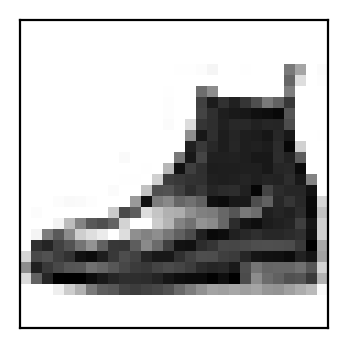

In [19]:
i = np.random.randint(0, x_train.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :, 0], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Now build and train the CNN.
When I trained a CNN I got this accuracy of ~87% on the test set, see if you can top it.

We also need to one-hot encode the labels.

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.Activation('softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history = model.fit(
    x_train, y_train,
    batch_size=50,
    epochs=10,
    validation_data=(x_test, y_test)
).history

Epoch 1/10
1200/1200 [==============================] - 50s 40ms/step - loss: 0.5534 - accuracy: 0.7980 - val_loss: 0.3942 - val_accuracy: 0.8517
Epoch 2/10
1200/1200 [==============================] - 60s 50ms/step - loss: 0.3678 - accuracy: 0.8654 - val_loss: 0.3154 - val_accuracy: 0.8840
Epoch 3/10
1200/1200 [==============================] - 60s 50ms/step - loss: 0.3200 - accuracy: 0.8816 - val_loss: 0.2868 - val_accuracy: 0.8933
Epoch 4/10
1200/1200 [==============================] - 64s 53ms/step - loss: 0.2911 - accuracy: 0.8924 - val_loss: 0.2761 - val_accuracy: 0.8969
Epoch 5/10
1200/1200 [==============================] - 60s 50ms/step - loss: 0.2694 - accuracy: 0.9007 - val_loss: 0.2618 - val_accuracy: 0.9022
Epoch 6/10
1200/1200 [==============================] - 53s 45ms/step - loss: 0.2566 - accuracy: 0.9047 - val_loss: 0.2530 - val_accuracy: 0.9038
Epoch 7/10
1200/1200 [==============================] - 51s 43ms/step - loss: 0.2425 - accuracy: 0.9097 - val_loss: 0.2485 -

In [24]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.24262717366218567
Test accuracy: 0.9107000231742859


In [26]:
# Save model
model.save('../data/keras_cnn_fashion_model.keras')